# Importando Bibliotecas

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,make_scorer,f1_score,recall_score,accuracy_score,precision_score,balanced_accuracy_score
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV


## Abrindo os arquivos de treino e de testes

In [3]:
# Treino e Teste

In [4]:
dados_treino = pd.read_csv("D:/puc/oficina maker machine learning/drive_trabalho/treino_limpo.csv")
dados_teste = pd.read_csv("D:/puc/oficina maker machine learning/drive_trabalho/teste_limpo.csv")

In [5]:
dados_treino.shape

(224477, 12)

In [6]:
dados_teste.shape

(210785, 12)

In [7]:
dados_treino.isnull().any()

HS_CPF                       False
ESTIMATIVARENDA              False
QTDDECLARACAOISENTA          False
ANOSULTIMARESTITUICAO        False
ANOSULTIMADECLARACAO         False
ANOSULTIMADECLARACAOPAGAR    False
IDADEMEDIACEP                False
TEMPOCPF                     False
DISTZONARISCO                False
TARGET                       False
QTDPESSOASCASA               False
ESTIMATIVARENDA_CAT          False
dtype: bool

In [8]:
dados_teste.isnull().any()

HS_CPF                       False
ESTIMATIVARENDA              False
QTDDECLARACAOISENTA          False
ANOSULTIMARESTITUICAO        False
ANOSULTIMADECLARACAO         False
ANOSULTIMADECLARACAOPAGAR    False
IDADEMEDIACEP                False
TEMPOCPF                     False
DISTZONARISCO                False
TARGET                       False
QTDPESSOASCASA               False
ESTIMATIVARENDA_CAT          False
dtype: bool

# Normalizando

In [9]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dados_treino)
dados_treino = pd.DataFrame(np_scaled, columns=dados_treino.columns)


In [10]:
dados_treino.head(2)


,HS_CPF,ESTIMATIVARENDA,QTDDECLARACAOISENTA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,IDADEMEDIACEP,TEMPOCPF,DISTZONARISCO,TARGET,QTDPESSOASCASA,ESTIMATIVARENDA_CAT
0,0.237663,0.047297,0.000000,0.0,0.35,0.117647,0.379310,0.384615,0.042885,0.0,0.000,0.666667
1,0.771472,0.037162,0.666667,0.0,0.45,0.117647,0.448276,0.961538,0.160416,0.0,0.125,0.666667


In [11]:
dados_treino.shape


(224477, 12)

In [12]:
dados_treino.columns

Index(['HS_CPF', 'ESTIMATIVARENDA', 'QTDDECLARACAOISENTA',
       'ANOSULTIMARESTITUICAO', 'ANOSULTIMADECLARACAO',
       'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP', 'TEMPOCPF',
       'DISTZONARISCO', 'TARGET', 'QTDPESSOASCASA', 'ESTIMATIVARENDA_CAT'],
      dtype='object')

In [13]:
# Movendo target pra ultima coluna
dados_treino = dados_treino.reindex(columns=['HS_CPF', 'ESTIMATIVARENDA', 'QTDDECLARACAOISENTA',
       'ANOSULTIMARESTITUICAO', 'ANOSULTIMADECLARACAO',
       'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP', 'TEMPOCPF',
       'DISTZONARISCO','QTDPESSOASCASA', 'ESTIMATIVARENDA_CAT', 'TARGET'])

In [14]:
dados_treino.head(2)
dados_treino.shape

(224477, 12)

In [15]:
dados_teste.shape

(210785, 12)

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dados_teste)
dados_teste = pd.DataFrame(np_scaled, columns=dados_teste.columns)


In [17]:
dados_teste.head()
dados_teste.shape

(210785, 12)

In [18]:
dados_teste.columns

Index(['HS_CPF', 'ESTIMATIVARENDA', 'QTDDECLARACAOISENTA',
       'ANOSULTIMARESTITUICAO', 'ANOSULTIMADECLARACAO',
       'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP', 'TEMPOCPF',
       'DISTZONARISCO', 'TARGET', 'QTDPESSOASCASA', 'ESTIMATIVARENDA_CAT'],
      dtype='object')

In [19]:
dados_teste = dados_teste.reindex(columns=['HS_CPF', 'ESTIMATIVARENDA', 'QTDDECLARACAOISENTA',
       'ANOSULTIMARESTITUICAO', 'ANOSULTIMADECLARACAO',
       'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP', 'TEMPOCPF',
       'DISTZONARISCO','QTDPESSOASCASA', 'ESTIMATIVARENDA_CAT', 'TARGET'])

In [20]:
dados_teste.head(2)

,HS_CPF,ESTIMATIVARENDA,QTDDECLARACAOISENTA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,IDADEMEDIACEP,TEMPOCPF,DISTZONARISCO,QTDPESSOASCASA,ESTIMATIVARENDA_CAT,TARGET
0,0.443688,0.027027,1.0,0.0,0.0,0.064516,0.481481,0.962963,0.035028,0.000,0.666667,0.0
1,0.700741,0.206081,0.0,0.0,0.0,0.032258,0.388889,1.000000,0.045349,0.375,1.000000,0.0


In [21]:
dados_teste.shape

(210785, 12)

# Excluindo coluna sem influência no Target

In [22]:
dados_treino.drop(['HS_CPF'], axis=1, inplace=True)

In [23]:
dados_treino.columns

Index(['ESTIMATIVARENDA', 'QTDDECLARACAOISENTA', 'ANOSULTIMARESTITUICAO',
       'ANOSULTIMADECLARACAO', 'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP',
       'TEMPOCPF', 'DISTZONARISCO', 'QTDPESSOASCASA', 'ESTIMATIVARENDA_CAT',
       'TARGET'],
      dtype='object')

In [24]:
dados_teste.drop(['HS_CPF'], axis=1, inplace=True)

In [25]:
dados_teste.columns

Index(['ESTIMATIVARENDA', 'QTDDECLARACAOISENTA', 'ANOSULTIMARESTITUICAO',
       'ANOSULTIMADECLARACAO', 'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP',
       'TEMPOCPF', 'DISTZONARISCO', 'QTDPESSOASCASA', 'ESTIMATIVARENDA_CAT',
       'TARGET'],
      dtype='object')

In [26]:
X_train, y_train = dados_treino.iloc[:,:-1], dados_treino.iloc[:, -1]
X_train.shape


(224477, 10)

In [27]:
X_test, y_test = dados_teste.iloc[:,:-1], dados_teste.iloc[:, -1]
y_test.shape

(210785,)

# Kolmogorov

In [28]:
import scipy.stats as stats

In [29]:
X_train.columns

Index(['ESTIMATIVARENDA', 'QTDDECLARACAOISENTA', 'ANOSULTIMARESTITUICAO',
       'ANOSULTIMADECLARACAO', 'ANOSULTIMADECLARACAOPAGAR', 'IDADEMEDIACEP',
       'TEMPOCPF', 'DISTZONARISCO', 'QTDPESSOASCASA', 'ESTIMATIVARENDA_CAT'],
      dtype='object')

In [30]:
# Exemplo
stats.ks_2samp(X_train.DISTZONARISCO, X_test.DISTZONARISCO)

Ks_2sampResult(statistic=0.0617486493583671, pvalue=0.0)

In [31]:
#for i in range(10):
    #print(ks_2samp(X_train[:, i], X_test[:, i]))

# DecisionTree

Resultado sem balancear:
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90    202381
         1.0       0.04      0.15      0.06      8404

    accuracy                           0.82    210785
   macro avg       0.50      0.50      0.48    210785
weighted avg       0.92      0.82      0.87    210785

Acurácia: 0.8184026377588538
Recall: 0.14969062351261303
Precision: 0.038839147885149736
F1 Score: 0.061675736627935476
Matriz de Confusão:
[[171249  31132]
 [  7146   1258]]


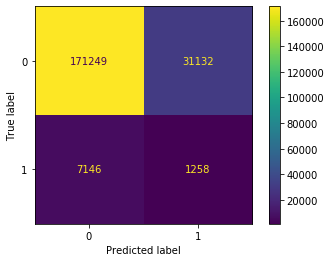

In [32]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(dado, dados_teste, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Resultado sem balancear:')
print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred)))
print("Precision: {}" . format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()


In [33]:
data1 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 1])
data2 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 0])
stats.ks_2samp(data1, data2)

Ks_2sampResult(statistic=0.6922893860066635, pvalue=0.0)

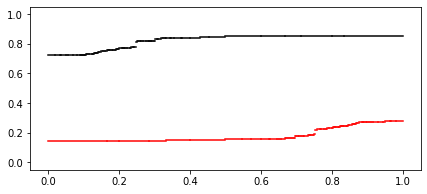

In [317]:
#Visualizacao
plt.figure(figsize=(7, 3))
last, i = 0, 0
while i < len(data1):
    plt.plot([last, data1[i]], [i/len(data1), i/len(data1)], 'k')
    if i < len(data1):
        last = data1[i]
    i += 1
 
last, i = 0, 0
while i < len(data2):
    plt.plot([last, data2[i]], [i/len(data2), i/len(data2)], 'r')
    if i < len(data2):
        last = data2[i]
    i += 1


## Random

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97    202381
         1.0       0.05      0.04      0.04      8404

    accuracy                           0.94    210785
   macro avg       0.51      0.50      0.50    210785
weighted avg       0.92      0.94      0.93    210785

Acurácia: 0.9357117441943212
Recall: 0.03641123274631128
Precision: 0.05313422469178677
F1 Score: 0.04321118407117136
Matriz de Confusão:
[[196928   5453]
 [  8098    306]]


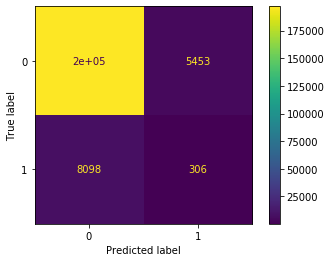

In [35]:
print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred)))
print("Precision: {}" . format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [36]:
data1 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 1])
data2 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 0])
stats.ks_2samp(data1, data2)

Ks_2sampResult(statistic=0.9375297477391719, pvalue=0.0)

# SVM

In [ ]:
from sklearn import svm

#Criando um Classificador SVR
clf = svm.SVC()#(kernel='linear') # Linear Kernel

#Treinando o modelo com o conjunto de treino
clf.fit(X_train, y_train)

#Fazendo a predição
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred)) #zero_division
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred, zero_division=1)))
print("Precision: {}" . format(precision_score(y_test, y_pred, zero_division=1)))
print("F1 Score: {}".format(f1_score(y_test, y_pred, zero_division=1)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [ ]:
data1 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 1])
data2 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 0])
stats.ks_2samp(data1, data2)

# Naive Bayes

In [37]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
clf = GaussianNB()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [38]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7004483241217354


              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82    202381
         1.0       0.06      0.41      0.10      8404

    accuracy                           0.70    210785
   macro avg       0.51      0.56      0.46    210785
weighted avg       0.93      0.70      0.79    210785

Acurácia: 0.7004483241217354
Recall: 0.4117087101380295
Precision: 0.056116904812105683
F1 Score: 0.09877107092390917
Matriz de Confusão:
[[144184  58197]
 [  4944   3460]]


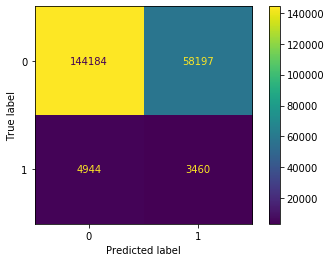

In [39]:
print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred)))
print("Precision: {}" . format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [ ]:
data1 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 1])
data2 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 0])
stats.ks_2samp(data1, data2)

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
clf = LogisticRegression()

# fit the model with data
clf.fit(X_train,y_train)

#
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    202381
         1.0       0.00      0.00      0.00      8404

    accuracy                           0.96    210785
   macro avg       0.48      0.50      0.49    210785
weighted avg       0.92      0.96      0.94    210785

Acurácia: 0.9601299902744502
Recall: 0.0
Precision: 1.0
F1 Score: 0.0
Matriz de Confusão:
[[202381      0]
 [  8404      0]]


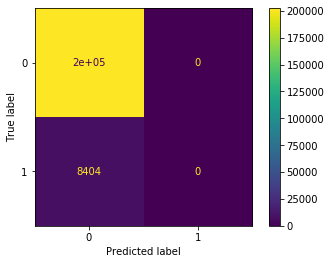

In [98]:
print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred, zero_division=1)))
print("Precision: {}" . format(precision_score(y_test, y_pred, zero_division=1)))
print("F1 Score: {}".format(f1_score(y_test, y_pred, zero_division=1)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
data1 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 1])
data2 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 0])
stats.ks_2samp(data1, data2)

# Boosting'

In [48]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100,learning_rate=1,algorithm='SAMME')

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    202381
         1.0       0.00      0.00      0.00      8404

    accuracy                           0.96    210785
   macro avg       0.48      0.50      0.49    210785
weighted avg       0.92      0.96      0.94    210785

Acurácia: 0.9601299902744502
Recall: 0.0
Precision: 1.0
F1 Score: 0.0
Matriz de Confusão:
[[202381      0]
 [  8404      0]]


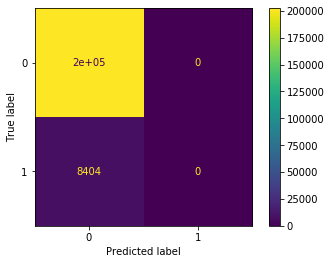

In [49]:
print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred, zero_division=1)))
print("Precision: {}" . format(precision_score(y_test, y_pred, zero_division=1)))
print("F1 Score: {}".format(f1_score(y_test, y_pred, zero_division=1)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

# Bagging

In [40]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [41]:
clf = BaggingClassifier()

In [42]:
clf.fit(X_train, y_train)

BaggingClassifier()

In [43]:
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    202381
         1.0       0.05      0.06      0.06      8404

    accuracy                           0.92    210785
   macro avg       0.51      0.51      0.51    210785
weighted avg       0.92      0.92      0.92    210785

Acurácia: 0.9219583936238347
Recall: 0.057710613993336504
Precision: 0.05379325643300799
F1 Score: 0.05568312284730195
Matriz de Confusão:
[[193850   8531]
 [  7919    485]]


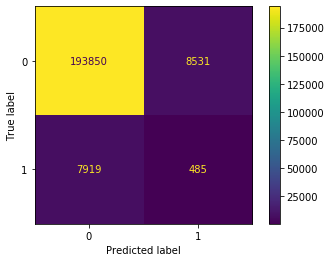

In [44]:
print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred)))
print("Precision: {}" . format(precision_score(y_test, y_pred, zero_division=1)))
print("F1 Score: {}".format(f1_score(y_test, y_pred, zero_division=1)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [ ]:
data1 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 1])
data2 = np.sort(clf.predict_proba(X_test[y_test==1])[:, 0])
stats.ks_2samp(data1, data2)

# Gaussian

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred)))
print("Precision: {}" . format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

# Categorical

In [55]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()

In [56]:
clf.fit(X_train, y_train)

CategoricalNB()

In [57]:
y_pred = clf.predict_proba(X_test)

In [58]:
#print(classification_report(y_test, y_pred))
print("Acurácia: {}".format(accuracy_score(y_test,y_pred)))
print("Recall: {}" .format(recall_score(y_test,y_pred)))
print("Precision: {}" . format(precision_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))
print("Matriz de Confusão:")
print(confusion_matrix(y_test,y_pred, labels=True))
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets